# Nonparametric Statistical Hypothesis Test in Python

Nonparametric statistics are those methods that do not assume a specific distribution to the data.

Often, they refer to statistical methods that do not assume a Gaussian distribution. They were developed for use with ordinal or interval data, but in practice can also be used with a ranking of real-valued observations in a data sample rather than on the observation values themselves.

A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.

This question can be answered for data samples that do not have a Gaussian distribution by using nonparametric statistical significance tests. The null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn the difference between sample estimates of population parameters, such as means or medians may be significant.

n general, each test calculates a test statistic, that must be interpreted with some background in statistics and a deeper knowledge of the statistical test itself. Tests also return a p-value that can be used to interpret the result of the test. The p-value can be thought of as the probability of observing the two data samples given the base assumption (null hypothesis) that the two samples were drawn from a population with the same distribution.

The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5% or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

* p <= alpha: reject H0, different distribution.
* p > alpha: fail to reject H0, same distribution.

## Test Dataset

We will generate two samples drawn from different distributions. We will draw the samples from Gaussian distributions for simplicity, although, as noted, the tests we review in this tutorial are for data samples where we do not know or assume any specific distribution.

We will use the randn() NumPy function to generate a sample of 100 Gaussian random numbers in each sample with a mean of 0 and a standard deviation of 1. Observations in the first sample are scaled to have a mean of 50 and a standard deviation of 5. Observations in the second sample are scaled to have a mean of 51 and a standard deviation of 5.

We expect the statistical tests to discover that the samples were drawn from differing distributions, although the small sample size of 100 observations per sample will add some noise to this decision.


In [1]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


## Mann-Whitney U/Wilcoxon-Mann Whitney Test

The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

* Fail to Reject H0: Sample distributions are equal.
* Reject H0: Sample distributions are not equal.

For the test to be effective, it requires at least 20 observations in each data sample.

In [2]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


## Wilcoxon Signed-Rank Test

In some cases, the data samples may be paired.

There are many reasons why this may be the case, for example, the samples are related or matched in some way or represent two measurements of the same technique. More specifically, each sample is independent, but comes from the same population.

Examples of paired samples in machine learning might be the same algorithm evaluated on different datasets or different algorithms evaluated on exactly the same training and test data.

The samples are not independent, therefore the Mann-Whitney U test cannot be used. Instead, the Wilcoxon signed-rank test is used, also called the Wilcoxon T test, named for Frank Wilcoxon. It is the equivalent of the paired Student T-test, but for ranked data instead of real valued data with a Gaussian distribution.

The default assumption for the test, the null hypothesis, is that the two samples have the same distribution.

* Fail to Reject H0: Sample distributions are equal.
* Reject H0: Sample distributions are not equal.

For the test to be effective, it requires at least 20 observations in each data sample.

In [3]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)


## Kruskal-Wallis H Test

When working with significance tests, such as Mann-Whitney U and the Wilcoxon signed-rank tests, comparisons between data samples must be performed pair-wise.

This can be inefficient if you have many data samples and you are only interested in whether two or more samples have a different distribution.

The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. It is named for the developers of the method, William Kruskal and Wilson Wallis. This test can be used to determine whether more than two independent samples have a different distribution. It can be thought of as the generalization of the Mann-Whitney U test.

The default assumption or the null hypothesis is that all data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much.

* Fail to Reject H0: All sample distributions are equal.
* Reject H0: One or more sample distributions are not equal.

Each data sample must be independent, have 5 or more observations, and the data samples can differ in size.

In [4]:
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

In [5]:
# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=6.051, p=0.049
Different distributions (reject H0)


## Friedman Test

As in the previous example, we may have more than two different samples and an interest in whether all samples have the same distribution or not.

If the samples are paired in some way, such as repeated measures, then the Kruskal-Wallis H test would not be appropriate. Instead, the Friedman test can be used, named for Milton Friedman.

The Friedman test is the nonparametric version of the repeated measures analysis of variance test, or repeated measures ANOVA. The test can be thought of as a generalization of the Kruskal-Wallis H Test to more than two samples.

The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.

* Fail to Reject H0: Paired sample distributions are equal.
* Reject H0: Paired sample distributions are not equal.

In [6]:
# Friedman test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.360, p=0.009
Different distributions (reject H0)


## Nonparametric Rank Correlation

Correlation is a measure of the association between two variables.

It is easy to calculate and interpret when both variables have a well understood Gaussian distribution. When we do not know the distribution of the variables, we must use nonparametric rank correlation methods.

The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. Ordinal data is data that has label values and has an order or rank relationship; for example: ‘low‘, ‘medium‘, and ‘high‘.

Rank correlation can be calculated for real-valued variables. This is done by first converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. Interestingly, rank correlation measures are often used as the basis for other statistical hypothesis tests, such as determining whether two samples were likely drawn from the same (or different) population distributions.

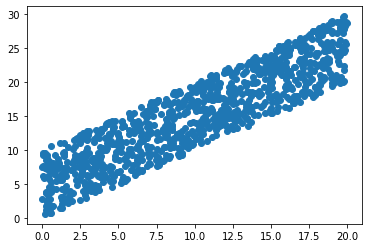

In [8]:
# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# plot
pyplot.scatter(data1, data2)
pyplot.show()


## Spearman's Rank Correlation

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.



In [9]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000
